


# Authorship of the Federalist Papers

The _Federalist Papers_ were a set of 85 essays published between 1787 and 1788 to promote the ratification of the United States Constitution. They were originally published under the pseudonym "Publius". Although the identity of the authors was a closely guarded secret at the time, most of the papers have since been conclusively attributed to one of Hamilton, Jay, or Madison. The known authorships can be found in `https://dlsun.github.io/pods/data/federalist/authorship.csv`.

For 15 of the papers, however, the authorships remain disputed. (These papers can be identified from the `authorship.csv` file because the "Author" field is blank.) In this analysis, you will use the papers with known authorship to predict the authorships of the disputed papers. The text of each paper is available at `https://dlsun.github.io/pods/data/federalist/x.txt`, where `x` is the number of the paper (i.e., a number from 1 to 85). The name of the file indicates the number of the paper.

In [47]:
import pandas as pd
import requests
from collections import Counter

author_df = pd.read_csv("https://dlsun.github.io/pods/data/federalist/authorship.csv")
papers_dir = "https://dlsun.github.io/pods/data/federalist/"

papers_files = []
#append all 85 papers to an array
for k in range (1,86):
  papers_files.append(str(k) + ".txt")

docs = pd.Series()
for file in papers_files:
  response = requests.get(papers_dir + file, "r")
  docs[file[:-4]] = response.text
docs

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  del sys.path[0]


1     To the People of the State of New York:\n\nAFT...
2     To the People of the State of New York:\n\nWHE...
3     To the People of the State of New York:\n\nIT ...
4     To the People of the State of New York:\n\nMY ...
5     To the People of the State of New York:\n\nQUE...
                            ...                        
81    To the People of the State of New York:\n\nLET...
82    To the People of the State of New York:\n\nTHE...
83    To the People of the State of New York:\n\nTHE...
84    To the People of the State of New York:\n\nIN ...
85    To the People of the State of New York:\n\nACC...
Length: 85, dtype: object

## Question 1

When analyzing an author's style, common words like "the" and "on" are actually more useful than rare words like "hostilities". That is because rare words typically signify context. Context is useful if you are trying to find documents about similar topics, but not so useful if you are trying to identify an author's style because different authors can write about the same topic. For example, both Dr. Seuss and Charles Dickens used rare words like "chimney" and "stockings" in _How the Grinch Stole Christmas_ and _A Christmas Carol_, respectively. But they used common words very differently: Dickens used the word "upon" over 100 times, while Dr. Seuss did not use "upon" even once.

Read in the Federalist Papers. Convert each one into a vector of term frequencies. In order to restrict to common words, include only the top 50 words across the corpus. (Because we are restricting to the most common words already, there is no reason to reweight them using TF-IDF.)

In [48]:
import collections
import numpy as np
#get the word count of all docs
words = (
  docs.
  str.lower().
  str.replace("[^\w\s]", " ").
  str.split()
).apply(Counter)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


In [49]:
#filtering data by top 50 words per corpus
for k in range (0,85):
  words[k] = dict(words[k].most_common(50))
words

1     {'the': 133, 'of': 106, 'to': 72, 'and': 40, '...
2     {'the': 107, 'of': 83, 'and': 83, 'to': 53, 't...
3     {'the': 93, 'of': 62, 'and': 60, 'to': 56, 'or...
4     {'and': 90, 'the': 86, 'of': 72, 'to': 51, 'it...
5     {'and': 72, 'the': 66, 'of': 53, 'to': 45, 'wo...
                            ...                        
81    {'the': 389, 'of': 248, 'to': 163, 'in': 135, ...
82    {'the': 168, 'of': 94, 'to': 83, 'and': 41, 'i...
83    {'the': 485, 'of': 331, 'to': 219, 'in': 213, ...
84    {'the': 390, 'of': 293, 'to': 140, 'be': 94, '...
85    {'the': 246, 'of': 172, 'to': 115, 'in': 73, '...
Length: 85, dtype: object

In [50]:
df_words = pd.DataFrame(list(words))
df_words = df_words.fillna(0)
df_words.loc["Total"] = df_words.sum()
df_words.sort_values(by="Total", axis=1, ascending=False, inplace=True)
df_words.astype(int)

,the,of,to,and,in,a,be,that,it,is,which,by,as,this,have,or,for,will,not,would,their,with,from,are,an,they,on,states,government,been,may,state,all,but,its,other,has,power,people,more,...,even,own,objection,subordinate,inferior,commercial,concurrent,just,tax,where,party,exercise,sense,though,reasons,republics,neighbors,strength,sovereign,chosen,person,amphictyonic,opinion,constitutional,too,often,chief,northern,province,equal,others,provincial,guilt,pardoning,hand,single,direction,independence,fixed,never
0,133,106,72,40,27,25,34,28,20,13,18,14,10,14,10,6,12,25,14,0,14,0,11,12,11,6,9,0,9,0,11,6,9,0,10,0,6,0,6,7,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,107,83,53,83,34,30,15,44,38,16,11,10,16,14,17,10,13,0,10,5,21,13,0,6,0,22,8,0,9,8,0,0,0,8,5,0,6,0,23,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,93,62,56,60,25,13,31,20,21,7,11,18,24,6,7,32,11,24,13,0,11,10,15,8,0,5,6,11,16,0,6,8,0,7,0,7,5,0,8,13,...,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,86,72,51,90,24,16,26,17,28,10,10,14,20,0,9,24,12,15,14,17,19,12,8,11,0,17,11,0,16,0,10,6,0,10,9,11,0,0,8,13,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,66,53,45,72,28,9,31,23,21,7,10,10,0,6,0,10,7,7,8,37,11,11,11,0,0,11,5,0,0,0,0,0,0,0,0,0,0,0,0,11,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,168,94,83,41,38,22,36,19,13,15,18,0,15,14,7,13,0,7,13,11,6,6,14,11,10,10,0,8,0,0,14,18,7,0,0,0,0,10,0,0,...,0,0,0,6,6,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
82,485,331,219,121,213,139,105,121,102,116,79,82,54,60,54,26,39,24,36,48,0,30,22,43,20,29,18,23,0,36,0,33,28,25,21,21,22,0,0,23,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
83,390,293,140,89,91,72,94,84,64,68,53,31,35,36,27,21,27,38,30,18,29,14,20,33,15,22,21,19,25,18,26,27,14,18,0,0,19,13,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
84,246,172,115,73,73,68,34,34,41,38,42,11,20,13,23,12,12,16,20,0,0,8,9,13,20,9,18,16,10,17,16,11,13,7,0,0,15,0,7,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Question 2
Make a visualization that summarizes the most common words used by Hamilton, Madison, and Jay.

{'the': 246, 'of': 172, 'to': 115, 'and': 73, 'a': 68, 'jury': 56, 'trial': 47, 'which': 42, 'it': 41, 'is': 38}


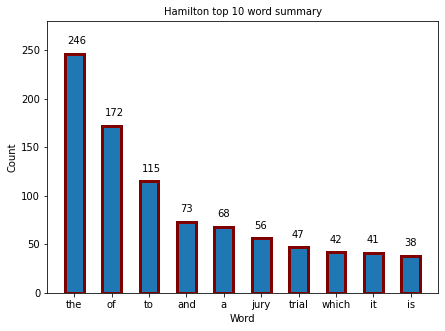

In [51]:
import matplotlib.pyplot as plt
#filter df by author
Hamilton_df = author_df[author_df["Author"] == "Hamilton"]
Madison_df = author_df[author_df["Author"] == "Madison"]
Jay_df = author_df[author_df["Author"] =="Jay"]

#get the paper numbers k
HamiltonPapers = Hamilton_df["Paper"].tolist()
#match the numbers to the corresponding words[k] and add to new dict
Dict = {}
for k in HamiltonPapers:
  #combine
  Dict.update(words[k-1])
#Dict now contains all the words by the author
#sort new list and grab the top 10 words for an organized plot

sorted_values = sorted(Dict.values(), reverse=True) # Sort the values
sorted_dict = {}
for i in sorted_values:
    for k in Dict.keys():
        if Dict[k] == i:
            sorted_dict[k] = Dict[k]
            break
sorted10 = dict(list(sorted_dict.items())[:10])
print(sorted10)

#plot the words
word_list = list(sorted10.keys())
values = list(sorted10.values())
plt.figure(figsize=(7,5))
#plt.bar(range(len(Dict)), values, tick_label=word_list)
pl = plt.bar(sorted10.keys(), sorted10.values(), width=.5, edgecolor='maroon', linewidth=3, )
for bar in pl:
    plt.annotate(bar.get_height(), 
                 xy=(bar.get_x()+0.07, bar.get_height()+10), 
                     fontsize=10)
plt.title('Hamilton top 10 word summary', fontsize=10)
plt.xlabel('Word', fontsize=10)
plt.ylabel('Count', fontsize=10)
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,0,280))
plt.show()

{'the': 169, 'of': 100, 'to': 54, 'and': 51, 'in': 46, 'a': 35, 'be': 31, 'is': 29, 'by': 28, 'that': 27}


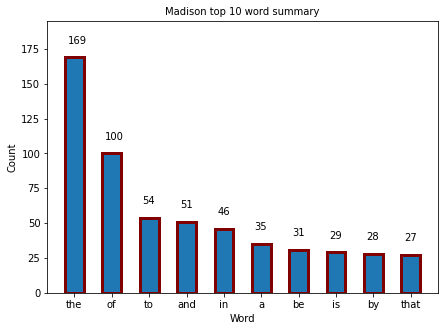

In [52]:
#get the paper numbers k
MadisonPapers = Madison_df["Paper"].tolist()
#match the numbers to the corresponding words[k] and add to new dict
Dict = {}
for k in MadisonPapers:
  #combine
  Dict.update(words[k-1])
#Dict now contains all the words by the author
#grab the top 10 words for an organized plot
sorted_values = sorted(Dict.values(), reverse=True) # Sort the values
sorted_dict = {}
for i in sorted_values:
    for k in Dict.keys():
        if Dict[k] == i:
            sorted_dict[k] = Dict[k]
            break
sorted10 = dict(list(sorted_dict.items())[:10])
print(sorted10)
#plot the words
word_list = list(sorted10.keys())
values = list(sorted10.values())
plt.figure(figsize=(7,5))
#plt.bar(range(len(Dict)), values, tick_label=word_list)
pl = plt.bar(sorted10.keys(), sorted10.values(), width=.5, edgecolor='maroon', linewidth=3)
for bar in pl:
    plt.annotate(bar.get_height(), 
                 xy=(bar.get_x()+0.07, bar.get_height()+10), 
                     fontsize=10)
plt.title('Madison top 10 word summary', fontsize=10)
plt.xlabel('Word', fontsize=10)
plt.ylabel('Count', fontsize=10)
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,0,195))
plt.show()

{'the': 174, 'and': 103, 'of': 99, 'to': 88, 'be': 57, 'in': 53, 'that': 46, 'as': 39, 'would': 37, 'a': 32}


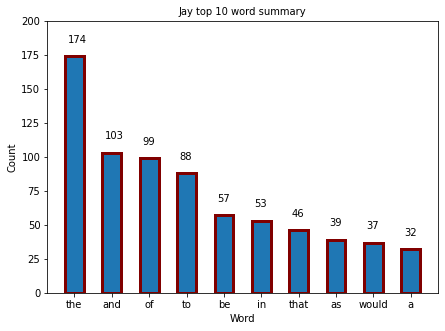

In [53]:
#get the paper numbers k
JayPapers = Jay_df["Paper"].tolist()
#match the numbers to the corresponding words[k] and add to new dict
Dict = {}
for k in JayPapers:
  #combine
  Dict.update(words[k-1])

#Dict now contains all the words by the author
#grab the top 10 words for an organized plot
sorted_values = sorted(Dict.values(), reverse=True) # Sort the values
sorted_dict = {}
for i in sorted_values:
    for k in Dict.keys():
        if Dict[k] == i:
            sorted_dict[k] = Dict[k]
            break
sorted10 = dict(list(sorted_dict.items())[:10])
print(sorted10)
#plot the words
word_list = list(sorted10.keys())
values = list(sorted10.values())
plt.figure(figsize=(7,5))
#plt.bar(range(len(Dict)), values, tick_label=word_list)
pl = plt.bar(sorted10.keys(), sorted10.values(), width=.5, edgecolor='maroon', linewidth=3)
for bar in pl:
    plt.annotate(bar.get_height(), 
                 xy=(bar.get_x()+0.07, bar.get_height()+10), 
                     fontsize=10)
plt.title('Jay top 10 word summary', fontsize=10)
plt.xlabel('Word', fontsize=10)
plt.ylabel('Count', fontsize=10)
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,0,200))
plt.show()

## Question 3

For each of the documents with disputed authorships, find the 5 most similar documents with _known_ authorships, using cosine distance on the term frequencies. Use the authors of these 5 most similar documents to predict the author of each disputed document. (For example, if 3 of the 5 closest documents were written by Hamilton, 1 by Madison, and 1 by Jay, then we would predict that the disputed document was written by Hamilton.)

In [54]:
#only the papers with unknown authors
disputed_df = author_df[author_df["Author"].isnull()]
disputedPapersIndex = disputed_df["Paper"].tolist()

papers_files = []
#append only unknown
for k in disputedPapersIndex:
  papers_files.append(str(k) + ".txt")

#index 0 - 15
unknownDocs = pd.Series()
for file in papers_files:
  response = requests.get(papers_dir + file, "r")
  unknownDocs[file[:-4]] = response.text

#only the papers with known authors
author_df_70 = author_df.dropna()
knownPaperIndex = author_df_70["Paper"].tolist()

papers_files = []
#append only known
for k in knownPaperIndex:
  papers_files.append(str(k) + ".txt")

# 0 - 69
knownDocs = pd.Series()
for file in papers_files:
  response = requests.get(papers_dir + file, "r")
  knownDocs[file[:-4]] = response.text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [55]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#vectorize docs
vec = TfidfVectorizer()
vec.fit(unknownDocs,knownDocs)
tf_idf_knownDocs = vec.transform(knownDocs)
tf_idf_unknownDocs = vec.transform(unknownDocs)
#contains similarity between 0 th element and other docs
arr = cosine_similarity(tf_idf_unknownDocs,tf_idf_knownDocs)

In [56]:
#for finding most common predicted author
def maximum(a, b, c):
  
    if (a >= b) and (a >= c):
        largest = a
  
    elif (b >= a) and (b >= c):
        largest = b
    else:
        largest = c
          
    return largest

#top5 papers based on highest similarity
index = np.argpartition(arr, -5, axis=1)[:, -5:]
i = 0

#loop through using top 5 index to find the matching papers 
#doble array is [unknown][known] where unkown has 15 values and known has 70
for item in index:
  ham = 0;
  jay = 0;
  mad = 0;
  i+=1
  print("TOP 5 CLOSEST MATCHING PAPERS FOR PAPER #",int(unknownDocs.index[i-1]), " (UNKNOWN AUTHOR):", sep = '')
  #70
  for k in item:
    #find the known author paper number(not the index) by locating the paper with given index
    paper = knownDocs.index[k]
    #get the data for where the paper is located for known authors
    match = author_df_70[author_df_70["Paper"] == int(paper)]
    #print the papers that match
    print(match.to_string(index = False))

    if ((match["Author"] == "Hamilton").bool()):
      ham +=1
    elif ((match["Author"] == "Madison").bool()):
      mad +=1
    else:
      jay+=1
  max = maximum(ham,jay,mad)
  if (max == mad):
    print("RESULT: PREDICTED AUTHOR FOR PAPER #",int(unknownDocs.index[i-1])," IS: MADISON WITH ",max," MATCHES\n", sep = '')
  elif (max == ham):
    print("RESULT: PREDICTED AUTHOR FOR PAPER #",int(unknownDocs.index[i-1])," IS: HAMILTON WITH ",max," MATCHES\n",sep = '')
  else:
    print("RESULT: PREDICTED AUTHOR FOR PAPER #",int(unknownDocs.index[i-1])," IS: JAY WITH ",max," MATCHES\n",sep = '')


TOP 5 CLOSEST MATCHING PAPERS FOR PAPER #18 (UNKNOWN AUTHOR):
 Paper  Author
    46 Madison
 Paper  Author
    41 Madison
 Paper  Author
    44 Madison
 Paper  Author
    45 Madison
 Paper  Author
    43 Madison
RESULT: PREDICTED AUTHOR FOR PAPER #18 IS: MADISON WITH 5 MATCHES

TOP 5 CLOSEST MATCHING PAPERS FOR PAPER #19 (UNKNOWN AUTHOR):
 Paper  Author
    42 Madison
 Paper  Author
    41 Madison
 Paper   Author
    17 Hamilton
 Paper   Author
     6 Hamilton
 Paper  Author
    44 Madison
RESULT: PREDICTED AUTHOR FOR PAPER #19 IS: MADISON WITH 3 MATCHES

TOP 5 CLOSEST MATCHING PAPERS FOR PAPER #20 (UNKNOWN AUTHOR):
 Paper  Author
    43 Madison
 Paper  Author
    37 Madison
 Paper   Author
    22 Hamilton
 Paper  Author
    41 Madison
 Paper  Author
    38 Madison
RESULT: PREDICTED AUTHOR FOR PAPER #20 IS: MADISON WITH 4 MATCHES

TOP 5 CLOSEST MATCHING PAPERS FOR PAPER #49 (UNKNOWN AUTHOR):
 Paper  Author
    45 Madison
 Paper  Author
    41 Madison
 Paper   Author
    78 Hamilton
 Pa

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 5 - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.